![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

Project Instructions

Help the fitness studio explore interest in workouts at a global and national level.

    When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

    Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

    What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

    You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [65]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Start coding here
three_keywords_geo = pd.read_csv('data/three_keywords_geo.csv')
three_keywords = pd.read_csv('data/three_keywords.csv')
workout_geo = pd.read_csv('data/workout_geo.csv')
workout = pd.read_csv('data/workout.csv')

In [67]:
print(three_keywords_geo.head())
print(three_keywords.head())
print(workout_geo.head())
print(workout.head())

     Country  home_workout_2018_2023  gym_workout_2018_2023  home_gym_2018_2023
0  Gibraltar                     NaN                    NaN                 NaN
1    Lesotho                     NaN                    NaN                 NaN
2       Guam                     NaN                    NaN                 NaN
3   Botswana                     NaN                    NaN                 NaN
4     Brunei                     NaN                    NaN                 NaN
     month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13                     16                   9
3  2018-06                      12                     17                   9
4  2018-07                      12                     17                   9
                             country  workout_2018_2

In [68]:
workout['month'] = pd.to_datetime(workout['month'])
workout.dtypes

month                datetime64[ns]
workout_worldwide             int64
dtype: object

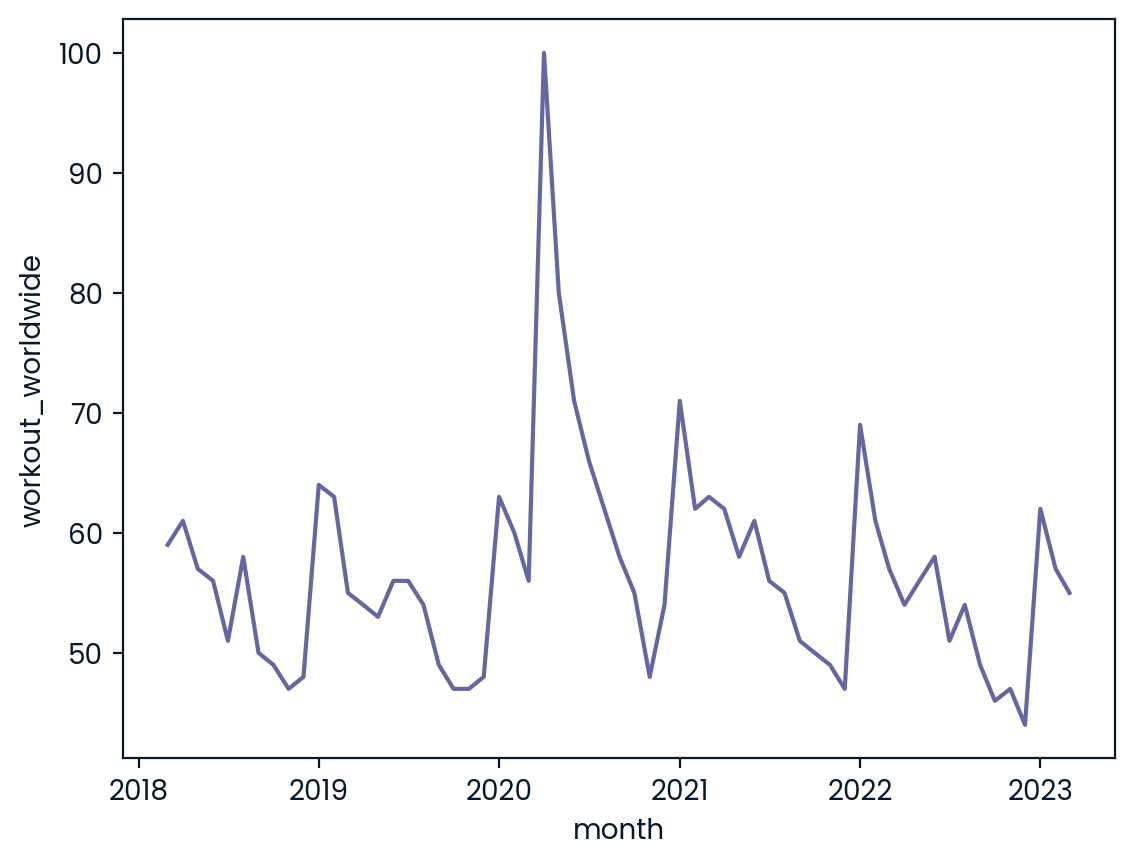

Max_value: 100
Occured ar: 2020


In [69]:
import seaborn as sns
sns.lineplot(data=workout, x="month", y="workout_worldwide")
plt.show()
max_value = workout['workout_worldwide'].max()
peak_month = workout.loc[workout["workout_worldwide"].idxmax(), "month"]
year_str = str(peak_month.year)
print( "Max_value:",max_value)
print("Occured ar:", year_str)

In [70]:
three_keywords['month'] = pd.to_datetime(three_keywords['month'])
covid_period = three_keywords[(three_keywords['month'] >= "2020-01") & (three_keywords['month'] <= "2021-01")]
covid_peaks = covid_period[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].max()
peak_covid = covid_peaks.idxmax()
print(peak_covid)

home_workout_worldwide


In [71]:
latest_row = three_keywords[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].iloc[-1]
current = latest_row.idxmax()
print(current)


gym_workout_worldwide


In [72]:
countries = ["United States", "Australia", "Japan"]

filtered = workout_geo[workout_geo["country"].isin(countries)]
top_country = filtered.loc[filtered["workout_2018_2023"].idxmax(), "country"]
print(top_country)


United States


In [73]:
countries = ["Philippines", "Malaysia"]
filtered = three_keywords_geo[three_keywords_geo["Country"].isin(countries)]
home_workout_geo = filtered.loc[filtered["home_workout_2018_2023"].idxmax(), "Country"]
print("Country with higher home workout interest:", home_workout_geo)

Country with higher home workout interest: Philippines
